In [215]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import requests as req
import json
from citipy import citipy

#Observed Trend 1:
#Observed Trend 2:
#Observed Trend 3:

In [216]:
url = "http://api.openweathermap.org/data/2.5/weather?"
myweatherkey = '383110043a1d03ca838185f17b637183'
units = "imperial"
location_df = pd.DataFrame()
query_url = url + "appid=" + myweatherkey + "&units=" + units + "&q="

In [217]:
#Create list of random latutudes and longitudes
for x in range(600):
    rand_latitude = np.random.uniform(low=-90.000,high=90.000,size=1)
    rand_longitude = np.random.uniform(low=-180.000,high=180.000,size=1)
    random_loc = pd.DataFrame([[rand_latitude,rand_longitude]],columns=['latitude','longitude']).astype(float)
    location_df = location_df.append(random_loc)
my_location_df = location_df.reset_index()
my_location_df.head(3)

,index,latitude,longitude
0,0,-9.181301,-168.447506
1,0,-31.618813,133.374329
2,0,56.685570,83.045366


In [218]:
#Create random list of cities
citylist = []
row = 0
while row <600:
    latitude = my_location_df['latitude'][row]
    longitude = my_location_df['longitude'][row]
    city=citipy.nearest_city(latitude,longitude)
    cityname = city.city_name
    country_code = city.country_code
    
    if city not in citylist:
        citylist.append([cityname,country_code,latitude,longitude])
    row += 1

In [219]:
citylist_df = pd.DataFrame(citylist,columns=['cityname','country_code','latitude','longitude'])
city_length = len(citylist_df['cityname'])
print(len(citylist_df['cityname']))

600


In [220]:
#Create empty URL list
url_list = []   
cities = citylist_df['cityname']
cities_list = list(cities.values.flatten())

In [221]:
index = 0
for c in cities_list:
    city = c
    url_id = query_url+str(c)
    print("Record " + str(index+1) + " of " + str(city_length) + " " + str(c))
    print(url_id)
    url_list.append(url_id)  
    index +=1
url_list

Record 1 of 600 samusu
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=samusu
Record 2 of 600 flinders
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=flinders
Record 3 of 600 kozhevnikovo
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=kozhevnikovo
Record 4 of 600 faya
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=faya
Record 5 of 600 qibili
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=qibili
Record 6 of 600 charleston
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=charleston
Record 7 of 600 mataura
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=mataura
Record 8 of 600 sao gabriel da cachoeira
http:/

['http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=samusu',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=flinders',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=kozhevnikovo',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=faya',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=qibili',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=charleston',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=mataura',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=sao gabriel da cachoeira',
 'http://api.openweathermap.org/data/2.5/weather?appid=3831

In [222]:
print(len(url_list))

600


In [223]:
weather_json_l = []

for city in url_list:
    response = req.get(city).json()
    if response=={'cod': '404', 'message': 'city not found'}:
       continue
    weather_json_l.append(response)
    
weather_json_l

[{'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -34.58, 'lon': 150.85},
  'dt': 1519675200,
  'id': 6255012,
  'main': {'humidity': 100,
   'pressure': 1018,
   'temp': 57.2,
   'temp_max': 57.2,
   'temp_min': 57.2},
  'name': 'Flinders',
  'sys': {'country': 'AU',
   'id': 8231,
   'message': 0.0045,
   'sunrise': 1519587691,
   'sunset': 1519634201,
   'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
    'icon': '01n',
    'id': 800,
    'main': 'Clear'}],
  'wind': {'deg': 270, 'speed': 4.7}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 56.26, 'lon': 83.98},
  'dt': 1519680101,
  'id': 1502257,
  'main': {'grnd_level': 1032.19,
   'humidity': 60,
   'pressure': 1032.19,
   'sea_level': 1046.95,
   'temp': -20.36,
   'temp_max': -20.36,
   'temp_min': -20.36},
  'name': 'Kozhevnikovo',
  'sys': {'country': 'RU',
   'message': 0.0035,
   'sunrise': 1519608130,
   'sunset': 1519645953},
  'w

In [224]:
lat_data = [data.get("coord").get("lat") for data in weather_json_l]
temp_data = [data.get("main").get("temp") for data in weather_json_l]
city = [data.get("name") for data in weather_json_l]
humidity = [data.get("main").get('humidity') for data in weather_json_l]
wind_speed = [data.get('wind').get('speed') for data in weather_json_l]
cloudiness = [data.get('clouds').get('all') for data in weather_json_l]

In [225]:
weather_dict = {"Temperature (Fahrenheit)": temp_data, 
                "Latitude": lat_data,
                "city":city,
                "humidity":humidity,
                "wind speed":wind_speed,
                "Clouds":cloudiness}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,Clouds,Latitude,Temperature (Fahrenheit),city,humidity,wind speed
0,0,-34.58,57.20,Flinders,100,4.70
1,0,56.26,-20.36,Kozhevnikovo,60,2.59
2,0,18.39,59.00,Faya,72,5.82
3,1,38.35,55.40,Charleston,32,3.36
4,44,-46.19,51.02,Mataura,90,4.38


In [226]:
weather_df.set_index("city", inplace=True)
weather_df.head()

,Clouds,Latitude,Temperature (Fahrenheit),humidity,wind speed
city,,,,,
Flinders,0,-34.58,57.20,100,4.70
Kozhevnikovo,0,56.26,-20.36,60,2.59
Faya,0,18.39,59.00,72,5.82
Charleston,1,38.35,55.40,32,3.36
Mataura,44,-46.19,51.02,90,4.38


In [227]:
print(len(weather_df['Clouds']))

544


<function matplotlib.pyplot.show>

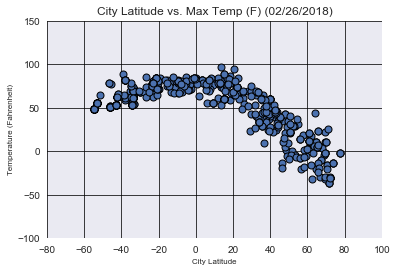

In [228]:
plt.scatter(x=weather_df["Latitude"], 
            y=weather_df["Temperature (Fahrenheit)"],
            edgecolors = "black",
            marker = "o",
            linewidth = 1.0)
            
plt.title("City Latitude vs. Max Temp (F) (02/26/2018)")
plt.xlabel('City Latitude',fontsize=8)
plt.ylabel('Temperature (Fahrenheit)',fontsize=8)

plt.xlim(-80,100)
plt.ylim(-100,150)
plt.gir = True
plt.grid(color='black',alpha=0.75)
            
sea.set()

plt.savefig("TemperatureInWorldCities3.png")

plt.show

<function matplotlib.pyplot.show>

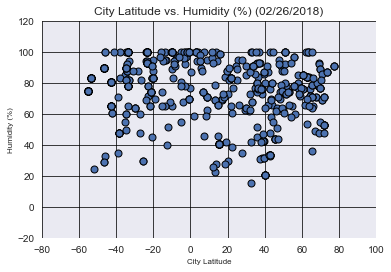

In [229]:
plt.scatter(x=weather_df["Latitude"], 
            y=weather_df["humidity"],
            edgecolors = "black",
            marker = "o",
            linewidth = 1.0)
            
plt.title("City Latitude vs. Humidity (%) (02/26/2018)")
plt.xlabel('City Latitude',fontsize=8)
plt.ylabel('Humidity (%)',fontsize=8)

plt.xlim(-80,100)
plt.ylim(-20,120)
plt.gir = True
plt.grid(color='black',alpha=0.75)
            
sea.set()

plt.savefig("HumidityWorldCities1.png")

plt.show

<function matplotlib.pyplot.show>

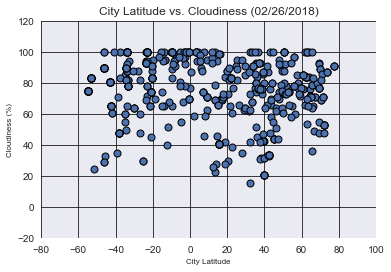

In [230]:
plt.scatter(x=weather_df["Latitude"], 
            y=weather_df["humidity"],
            edgecolors = "black",
            marker = "o",
            linewidth = 1.0)
            
plt.title("City Latitude vs. Cloudiness (02/26/2018)")
plt.xlabel('City Latitude',fontsize=8)
plt.ylabel('Cloudiness (%)',fontsize=8)

plt.xlim(-80,100)
plt.ylim(-20,120)
plt.gir = True
plt.grid(color='black',alpha=0.75)
            
sea.set()

plt.savefig("CloudsWorldCities1.png")

plt.show

<function matplotlib.pyplot.show>

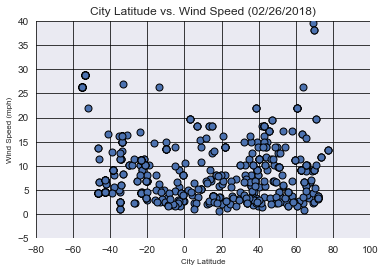

In [231]:
plt.scatter(x=weather_df["Latitude"], 
            y=weather_df["wind speed"],
            edgecolors = "black",
            marker = "o",
            linewidth = 1.0)
            
plt.title("City Latitude vs. Wind Speed (02/26/2018)")
plt.xlabel('City Latitude',fontsize=8)
plt.ylabel('Wind Speed (mph)',fontsize=8)

plt.xlim(-80,100)
plt.ylim(-5,40)
plt.gir = True
plt.grid(color='black',alpha=0.75)
            
sea.set()

plt.savefig("WindSpeedWorldCities1.png")

plt.show